# Artificial Neural Network

### Importing the libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


## Part 1 - Data Preprocessing

### Importing the dataset

In [101]:
dset = pd.read_excel('Folds5x2_pp.xlsx')
X = dset.iloc[:,:-1].values
y = dset.iloc[:,-1].values

In [102]:
X, y

(array([[  14.96,   41.76, 1024.07,   73.17],
        [  25.18,   62.96, 1020.04,   59.08],
        [   5.11,   39.4 , 1012.16,   92.14],
        ...,
        [  31.32,   74.33, 1012.92,   36.48],
        [  24.48,   69.45, 1013.86,   62.39],
        [  21.6 ,   62.52, 1017.23,   67.87]]),
 array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28]))

### Splitting the dataset into the Training set and Test set

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
X_train, y_train

(array([[  11.22,   43.13, 1017.24,   80.9 ],
        [  13.67,   54.3 , 1015.92,   75.42],
        [  32.84,   77.95, 1014.68,   45.8 ],
        ...,
        [  16.81,   38.52, 1018.26,   75.21],
        [  12.8 ,   41.16, 1022.43,   86.19],
        [  32.32,   67.9 , 1006.08,   37.93]]),
 array([473.93, 467.87, 431.97, ..., 459.01, 462.72, 428.12]))

In [105]:
X_test, y_test

(array([[  28.66,   77.95, 1009.56,   69.07],
        [  17.48,   49.39, 1021.51,   84.53],
        [  14.86,   43.14, 1019.21,   99.14],
        ...,
        [  12.24,   44.92, 1023.74,   88.21],
        [  27.28,   47.93, 1003.46,   59.22],
        [  17.28,   39.99, 1007.09,   74.25]]),
 array([431.23, 460.01, 461.14, ..., 473.26, 438.  , 463.28]))

### Feature Scaling:

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [107]:
ann = keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [108]:
ann.add(keras.layers.Dense(
    6, # 6 output neurons
    activation='relu',
    kernel_initializer='he_uniform',
    input_shape=X_train.shape[1:] # input will be dset_features/cols
))

### Adding the second hidden layer

In [109]:
ann.add(keras.layers.Dense(
    6, # 6 output neurons
    kernel_initializer='he_uniform',
    activation='relu',
))

### Adding the output layer

In [110]:
ann.add(keras.layers.Dense(
    1, # 1 output neuron
    activation='linear', # 'linear' as its a regression problem
))

## Part 3 - Training the ANN

### Compiling the ANN

In [111]:
ann.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse'],
)

### Training the ANN model on the Training set

In [112]:
ann_history = ann.fit(
    X_train, y_train, 
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
192/192 [==============================] - 1s 3ms/step - loss: 207111.2281 - mse: 207111.2281 - val_loss: 205842.5469 - val_mse: 205842.5469
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 205335.7210 - mse: 205335.7210 - val_loss: 202292.7969 - val_mse: 202292.7969
Epoch 3/100
192/192 [==============================] - 1s 3ms/step - loss: 200758.8825 - mse: 200758.8825 - val_loss: 191450.6719 - val_mse: 191450.6719
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 186059.7379 - mse: 186059.7379 - val_loss: 164292.3125 - val_mse: 164292.3125
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 154291.7575 - mse: 154291.7575 - val_loss: 121708.9766 - val_mse: 121708.9766
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 109780.7445 - mse: 109780.7445 - val_loss: 78070.9375 - val_mse: 78070.9375
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 68849.878

### Predicting the results of the Test set

In [113]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(
    np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1)
)

[[430.93 431.23]
 [456.99 460.01]
 [461.03 461.14]
 ...
 [467.74 473.26]
 [442.53 438.  ]
 [461.48 463.28]]


# Visualize:

In [114]:
ann_history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

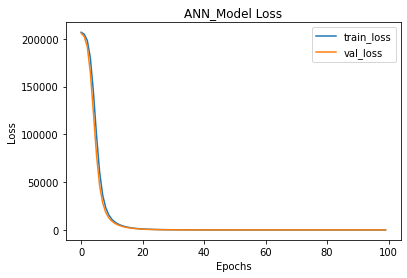

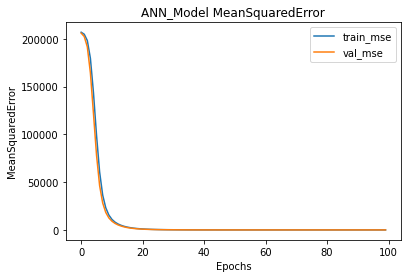

In [115]:
# ANN MODEL LOSS:
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.legend(['train_loss','val_loss'])
plt.title('ANN_Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# ANN MODEL MeanSquaredError:
plt.plot(ann_history.history['mse'])
plt.plot(ann_history.history['val_mse'])
plt.legend(['train_mse','val_mse'])
plt.title('ANN_Model MeanSquaredError')
plt.xlabel('Epochs')
plt.ylabel('MeanSquaredError')
plt.show()